In [3]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

import glob
import math
import statistics
from scipy.stats import mannwhitneyu, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [24]:
from utils_flg4 import addstats

## Load file with metadata and computational scores (from external_hyperlinearity_scores_plus_external2 notebook)

In [4]:
mcv4 = pd.read_excel("merged_scores_2023_updated.xlsx")

# Age analysis

In [ ]:
age_list = mcv4['age']
print(f" min age is: {min(age_list)}")
print(f" min age is: {max(age_list)}")

i = 0
for a in age_list:
    if a < 18:
        i = i + 1
print(f"patients aged <18yo: {i}")

## Age categories

In [57]:
age_categorised_1 = []
for x in mcv4['age']:
    if x < 2:
        age_categorised_1.append(0)
    if x >=2 and x <= 10:
        age_categorised_1.append(1)
    if x > 10 and x <= 17:
        age_categorised_1.append(2)
    if x > 17:
        age_categorised_1.append(3)
        

age_categorised_2 = []
for x in mcv4['age']:
    if x < 2:
        age_categorised_2.append(0)
    if x >=2 and x <= 10:
        age_categorised_2.append(1)
    if x > 10:
        age_categorised_2.append(2)
        


In [58]:
mcv4['age_categorised_1'] = age_categorised_1
mcv4['age_categorised_2'] = age_categorised_2


In [8]:
mcv4['age_categorised_1'].value_counts()

1    227
2    178
3     85
0     41
Name: age_categorised_1, dtype: int64

In [9]:
mcv4['age_categorised_2'].value_counts()

2    263
1    227
0     41
Name: age_categorised_2, dtype: int64

In [10]:
age_categorised_2_labels= ["<2 years \n n=41", 
                           '2-10 years \n n=227', 
                            '11+ years \n n=263']

age_categorised_2_labels_nonumbers= ["<2 years", 
                           '2-10 years', 
                            '11+ years']

age_categorised_1_labels= ["<2 years \n n=41" , 
                           '2-10 years \n n=227', 
                           '11-17 years \n n=178',
                            '18+ years \n n=85']

age_categorised_1_labels_nonumbers= ["<2 years", 
                           '2-10 years', 
                           '11-17 years',
                            '18+ years']

In [11]:
"""
Functions for plotting boxplot and adding statistical annotation
"""
def plotbox_age(a, xa, ya, ylabel, colours=[], alpha=0.9, s=5, hue='flg_binary',
            altlabel=False):
    groups=len(mcv4[xa].value_counts())
    sns.set(style="white")
    boxplot_width = 0.1   
    if colours == 'regular':
        colours=['lightskyblue','coral', 'dimgrey']
        ax = sns.swarmplot(x=xa, y=ya, data=a, palette=colours, alpha=alpha, s=s)
    elif colours == 'alternative':
        colours="ch:s=.25,rot=-.25"
        ax = sns.swarmplot(x=xa, y=ya, data=a, palette=colours, alpha=alpha, s=s)  
    elif colours:
        try:
            ax = sns.swarmplot(x=xa, y=ya, data=a, palette=colours, alpha=alpha, s=s)
        except:
            ax = sns.swarmplot(x=xa, y=ya, data=a, alpha=alpha, s=s)
    else:
        ax = sns.swarmplot(x=xa, y=ya, data=a, palette=colours, alpha=alpha, s=s)
    sns.boxplot(x=xa, y=ya, data=a, width=boxplot_width, ax=ax, 
                boxprops={'facecolor':'None'})
    if groups == 3:
        if  altlabel:
            plt.xticks([0, 1, 2], age_categorised_2_labels)
        else:
            plt.xticks([0, 1, 2], age_categorised_2_labels_nonumbers)
    elif groups == 4:
        if  altlabel:
            plt.xticks([0, 1, 2,3], age_categorised_1_labels)
        else:
            plt.xticks([0, 1, 2,3], age_categorised_1_labels_nonumbers)
    ax.set_xlabel('Age categories', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

    
 

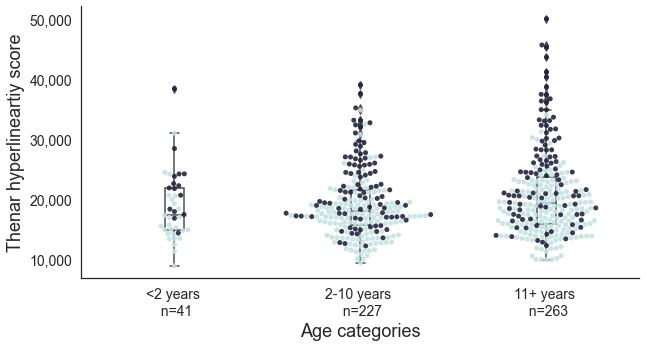

In [130]:
hue_graph_binary = 'flg_binary'
fig = plt.figure(figsize=(10,5))

ya="thenar_scores"
xa="age_categorised_2"
ylabel = "Thenar hyperlineartiy score"
a=mcv4
groups=len(mcv4[xa].value_counts())

ax = sns.swarmplot(x=xa, y=ya, data=mcv4, alpha=0.9, s=5, 
                   hue=hue_graph_binary, palette=colours)

sns.boxplot(x=xa, y=ya, data=a, width=0.1, ax=ax, 
                boxprops={'facecolor':'None'})
sns.set(style="white")
# if group_sizes_on_x:
#     plt.xticks([0, 1, 2, 3], clinical_hyperlinearity_group_sizes_label, fontsize=14)  # Add fontsize here
# else:
#     plt.xticks([0, 1, 2, 3], ['Absent', 'Mild', 'Moderate', 'Severe'], fontsize=14)  # Add fontsize here

# #ax.set_xlabel('Clinical hyperlinearity rating', fontsize=18)
#ax.set_ylabel('Computational  hyperlinearity score', fontsize=18)
#ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))


groups=len(mcv4[xa].value_counts())
if groups == 3:
    if show_numbers_in_eachgroup:
        plt.xticks([0, 1, 2], age_categorised_2_labels,fontsize=14)
    else:
        plt.xticks([0, 1, 2], age_categorised_2_labels_nonumbers,fontsize=14)
elif groups == 4:
    if show_numbers_in_eachgroup:
        plt.xticks([0, 1, 2,3], age_categorised_1_labels, fontsize=14)
    else:
        plt.xticks([0, 1, 2,3], age_categorised_1_labels_nonumbers,fontsize=14)
ax.set_xlabel('Age categories', fontsize=18)
ax.set_ylabel(ylabel, fontsize=18)
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_tick_params(labelsize=14)

#legend = ax.legend(['Wild type', 'FLG LoF mutation'],title='Filaggrin status', loc='upper right', frameon=False,  ncol=1,
#          bbox_to_anchor=(0.4, 1), fontsize=14, title_fontsize=16)
          
#legend.legendHandles[0]._sizes = [90]
#legend.legendHandles[1]._sizes = [90]
ax.get_legend().remove()  
#add_stats_fourgroups()
sns.despine()
plt.show()


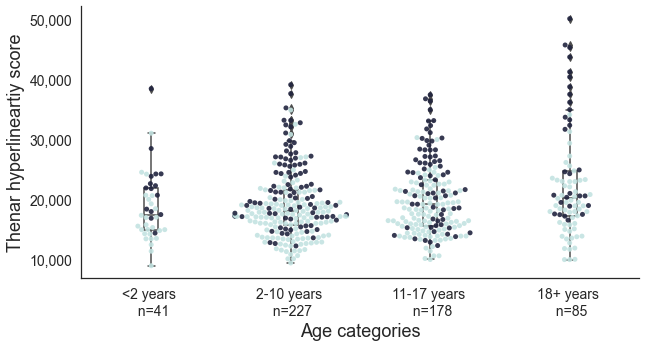

In [20]:
hue_graph_binary = 'flg_binary'
fig = plt.figure(figsize=(10,5))

ya="thenar_scores"
xa="age_categorised_1"
ylabel = "Thenar hyperlineartiy score"
a=mcv4
groups=len(mcv4[xa].value_counts())

ax = sns.swarmplot(x=xa, y=ya, data=mcv4, alpha=0.9, s=5, 
                   hue=hue_graph_binary, palette=colours)

sns.boxplot(x=xa, y=ya, data=a, width=0.1, ax=ax, 
                boxprops={'facecolor':'None'})
sns.set(style="white")
# if group_sizes_on_x:
#     plt.xticks([0, 1, 2, 3], clinical_hyperlinearity_group_sizes_label, fontsize=14)  # Add fontsize here
# else:
#     plt.xticks([0, 1, 2, 3], ['Absent', 'Mild', 'Moderate', 'Severe'], fontsize=14)  # Add fontsize here

# #ax.set_xlabel('Clinical hyperlinearity rating', fontsize=18)
#ax.set_ylabel('Computational  hyperlinearity score', fontsize=18)
#ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))


groups=len(mcv4[xa].value_counts())
if groups == 3:
    if show_numbers_in_eachgroup:
        plt.xticks([0, 1, 2], age_categorised_2_labels,fontsize=14)
    else:
        plt.xticks([0, 1, 2], age_categorised_2_labels_nonumbers,fontsize=14)
elif groups == 4:
    if show_numbers_in_eachgroup:
        plt.xticks([0, 1, 2,3], age_categorised_1_labels, fontsize=14)
    else:
        plt.xticks([0, 1, 2,3], age_categorised_1_labels_nonumbers,fontsize=14)
ax.set_xlabel('Age categories', fontsize=18)
ax.set_ylabel(ylabel, fontsize=18)
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_tick_params(labelsize=14)

#legend = ax.legend(['Wild type', 'FLG LoF mutation'],title='Filaggrin status', loc='upper right', frameon=False,  ncol=1,
#          bbox_to_anchor=(0.4, 1), fontsize=14, title_fontsize=16)
          
#legend.legendHandles[0]._sizes = [90]
#legend.legendHandles[1]._sizes = [90]
ax.get_legend().remove()  
#add_stats_fourgroups()
sns.despine()
plt.show()


#  FLG status vs hyperlinearity score in each age category

In [26]:
age0 = mcv4[mcv4['age_categorised_2'] == 0] #<2
age1 = mcv4[(mcv4['age_categorised_2'] == 1)] #2-10
age2 = mcv4[mcv4['age_categorised_2'] == 2] #11+

In [27]:
age0['FLG status_x'].value_counts()

0    26
1    12
2     3
Name: FLG status_x, dtype: int64

In [28]:
age0_labels = ["Wild Type\n(n=26)",
                "Heterozygous\n(n=12)",
                "Homozygous or compound\nhet. (n=3)"]
       

In [29]:
age1['FLG status_x'].value_counts()

0    135
1     86
2      6
Name: FLG status_x, dtype: int64

In [30]:
age1_labels = ["Wild Type\n(n=135)",
                "Heterozygous\n(n=86)",
                "Homozygous or compound\nhet. (n=6)"]
                        

In [31]:
age2['FLG status_x'].value_counts()

0    163
1     81
2     19
Name: FLG status_x, dtype: int64

In [33]:
def p_value_table(df):
    wt = df[df['FLG status_x'] == 0]
    het = df[df['FLG status_x'] == 1]
    hom = df[df['FLG status_x'] == 2]
    
    wt2 =  wt['thenar_scores']
    het2 = het['thenar_scores']
    hom2 = hom['thenar_scores']

    list_thenar_wt_scores = list(wt2)
    list_thenar_het_scores  = list(het2)
    list_thenar_hom_scores  = list(hom2)
    
    def oneway_anova_and_tukey_pvalues(a, b, c):
        F, p = f_oneway(a, b, c)
        print('Statistics=%.3f, p=%.3f' % (F, p))
        scores = a + b + c
        group = []
        for i in range(len(a)):
            group.append('WT')
        for i in range(len(b)):
            group.append('Het')
        for i in range(len(c)):
            group.append('Hom')
        df = pd.DataFrame({'score': scores, 'group': group})
        tukey = pairwise_tukeyhsd(endog=df['score'],
                                 groups=df['group'],
                                 alpha=0.05)
        print(tukey)  

    oneway_anova_and_tukey_pvalues(list_thenar_wt_scores , list_thenar_het_scores, list_thenar_hom_scores)



In [141]:
p_value_table(age0)

Statistics=6.886, p=0.003
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   Het    Hom  5158.5833 0.2543 -2660.4978 12977.6645  False
   Het     WT -4353.5962 0.0424 -8581.0205  -126.1718   True
   Hom     WT -9512.1795 0.0089 -16898.243 -2126.1159   True
------------------------------------------------------------


In [35]:
def plotbox9(a, xa, ya, ylabel="Thenar score", alpha=0.8, s=4):
    sns.set(style="white")
    boxplot_width = 0.1   
#    colours = ['darkblue']
    colours="ch:s=.25,rot=-.25"
    ax = sns.swarmplot(x=xa, y=ya, data=a, palette=colours, alpha=alpha, s=s) 
    sns.boxplot(x=xa, y=ya, data=a, width=boxplot_width, ax=ax, 
                boxprops={'facecolor':'None'})
    x = a[a['FLG status_x'] == 0]
    wtcount = str(len(x['FLG status_x']))
    
    x = a[a['FLG status_x'] == 1]
    hetcount = str(len(x['FLG status_x']))
    
    x = a[a['FLG status_x'] == 2]
    homcount = str(len(x['FLG status_x']))
    
    colours=['blue','red', 'green']


    plt.xticks([0, 1, 2], ["WT\n(n="+wtcount+")", 
                           "Het\n(n="+hetcount+")", 
                            "Hom/compound\nhet. (n="+homcount+")"], fontsize=14)
    ax.set_xlabel('Filaggrin gene mutation status', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

In [37]:
age3_labels = ["Wild Type\n(n=163)",
                "Heterozygous\n(n=81)",
                "Homozygous or compound\nhet. (n=19)"]
                           
#age0.head(1)

In [36]:
p_value_table(age0)

Statistics=6.886, p=0.003
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   Het    Hom  5158.5833 0.2543 -2660.4978 12977.6645  False
   Het     WT -4353.5962 0.0424 -8581.0205  -126.1718   True
   Hom     WT -9512.1795 0.0089 -16898.243 -2126.1159   True
------------------------------------------------------------


/var/folders/87/jz1lkxg141g8vvbsd1q4yh540000gn/T/ipykernel_74767/1086299573.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(x=xa, y=ya, data=a, palette=colours, alpha=alpha, s=s)


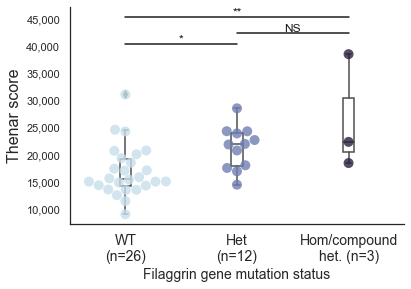

In [39]:
"""
T0.02 - figure
"""

a = age0
ylab = 'Thenar hyperlinearity score'

ya="thenar_scores"
plotbox9(a=a, xa="FLG status_x", ya=ya,  alpha=0.8, s=10)
#plotbox2(a=a, xa="FLG status", ya=ya, ylabel=ylab, alpha=0.5, s=3.5, altlabel=True)
ymax = a[ya].max()
addstats(result01="*", result12="NS", result02="**", a=a, ya=ya)

sns.despine()
plt.show()




In [40]:
p_value_table(age1)

Statistics=26.387, p=0.000
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
   Het    Hom  4693.6279 0.0681   -269.1584  9656.4143  False
   Het     WT -4349.7314    0.0  -5971.3045 -2728.1582   True
   Hom     WT -9043.3593 0.0001 -13947.0555  -4139.663   True
-------------------------------------------------------------


/var/folders/87/jz1lkxg141g8vvbsd1q4yh540000gn/T/ipykernel_74767/1086299573.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(x=xa, y=ya, data=a, palette=colours, alpha=alpha, s=s)
/Users/l/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


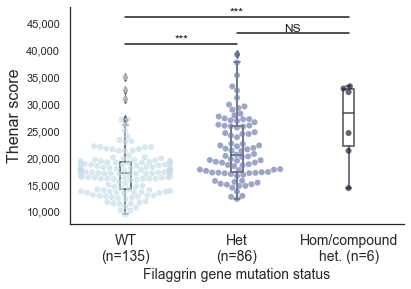

In [41]:
"""
T0.02 - figure
"""

a = age1
ylab = 'Thenar hyperlinearity score'

ya="thenar_scores"
plotbox9(a=a, xa="FLG status_x", ya=ya, alpha=0.7, s=6)
#plotbox2(a=a, xa="FLG status", ya=ya, ylabel=ylab, alpha=0.5, s=3.5, altlabel=True)
ymax = a[ya].max()
addstats(result01="***", result12="NS", result02="***", a=a, ya=ya)
sns.despine()
plt.show()




In [43]:
p_value_table(age2)

Statistics=48.215, p=0.000
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2   meandiff  p-adj    lower      upper    reject
-------------------------------------------------------------
   Het    Hom   7063.0006   0.0   3455.8994 10670.1019   True
   Het     WT  -5267.4001   0.0  -7191.0952 -3343.7049   True
   Hom     WT -12330.4007   0.0 -15760.7847 -8900.0167   True
-------------------------------------------------------------


/var/folders/87/jz1lkxg141g8vvbsd1q4yh540000gn/T/ipykernel_74767/1086299573.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(x=xa, y=ya, data=a, palette=colours, alpha=alpha, s=s)


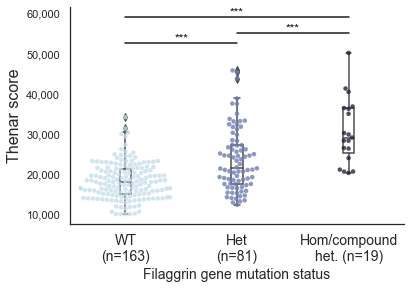

In [44]:
a = age2
ylab = 'Thenar hyperlinearity score'

ya="thenar_scores"
plotbox9(a=a, xa="FLG status_x", ya=ya, alpha=0.8, s=4.5)
#plotbox2(a=a, xa="FLG status", ya=ya, ylabel=ylab, alpha=0.5, s=3.5, altlabel=True)
ymax = a[ya].max()
addstats(result01="***", result12="***", result02="***", a=a, ya=ya)

sns.despine()
plt.show()




## 4 groups 

In [46]:
age0 = mcv4[mcv4['age_categorised_1'] == 0] #<2
age1 = mcv4[(mcv4['age_categorised_1'] == 1)] #2-10
age2 = mcv4[mcv4['age_categorised_1'] == 2] #11-17
age3 = mcv4[mcv4['age_categorised_1'] == 3] #18+

In [49]:
p_value_table(age0)

Statistics=6.886, p=0.003
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   Het    Hom  5158.5833 0.2543 -2660.4978 12977.6645  False
   Het     WT -4353.5962 0.0424 -8581.0205  -126.1718   True
   Hom     WT -9512.1795 0.0089 -16898.243 -2126.1159   True
------------------------------------------------------------


/var/folders/87/jz1lkxg141g8vvbsd1q4yh540000gn/T/ipykernel_74767/1086299573.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(x=xa, y=ya, data=a, palette=colours, alpha=alpha, s=s)


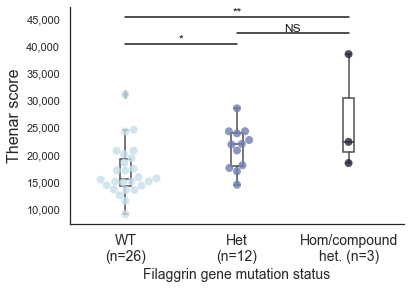

In [50]:
"""
T0.02 - figure
"""
a = age0
ylab = 'Thenar score'

ya="thenar_scores"
plotbox9(a=a, xa="FLG status_x", ya=ya, ylabel=ylab, alpha=0.8, s=8)
#plotbox2(a=a, xa="FLG status", ya=ya, ylabel=ylab, alpha=0.5, s=3.5, altlabel=True)
ymax = a[ya].max()
addstats(result01="*", result12="NS", result02="**", a=a, ya=ya)

sns.despine()
plt.show()




In [51]:
p_value_table(age1)

Statistics=26.387, p=0.000
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
   Het    Hom  4693.6279 0.0681   -269.1584  9656.4143  False
   Het     WT -4349.7314    0.0  -5971.3045 -2728.1582   True
   Hom     WT -9043.3593 0.0001 -13947.0555  -4139.663   True
-------------------------------------------------------------


/var/folders/87/jz1lkxg141g8vvbsd1q4yh540000gn/T/ipykernel_74767/1086299573.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(x=xa, y=ya, data=a, palette=colours, alpha=alpha, s=s)
/Users/l/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


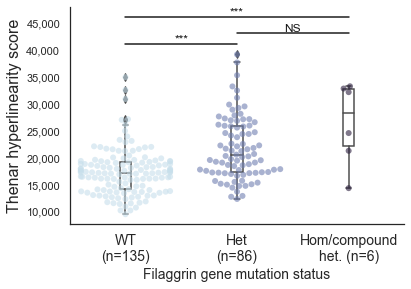

In [52]:
"""
T0.02 - figure
"""
a = age1
ylab = 'Thenar hyperlinearity score'

ya="thenar_scores"
plotbox9(a=a, xa="FLG status_x", ya=ya, ylabel=ylab, alpha=0.6, s=6)
#plotbox2(a=a, xa="FLG status", ya=ya, ylabel=ylab, alpha=0.5, s=3.5, altlabel=True)
ymax = a[ya].max()
addstats(result01="***", result12="NS", result02="***", a=a, ya=ya)

sns.despine()
plt.show()




In [53]:
p_value_table(age2)

Statistics=34.007, p=0.000
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2   meandiff  p-adj    lower      upper    reject
-------------------------------------------------------------
   Het    Hom    6709.691   0.0   3137.1396 10282.2423   True
   Het     WT  -3997.9415   0.0  -5900.9084 -2094.9746   True
   Hom     WT -10707.6325   0.0 -14119.9363 -7295.3287   True
-------------------------------------------------------------


/var/folders/87/jz1lkxg141g8vvbsd1q4yh540000gn/T/ipykernel_74767/1086299573.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(x=xa, y=ya, data=a, palette=colours, alpha=alpha, s=s)


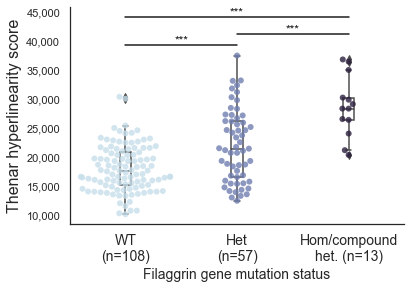

In [54]:
"""
T0.02 - figure
"""
a = age2
ylab = 'Thenar hyperlinearity score'

ya="thenar_scores"
plotbox9(a=a, xa="FLG status_x", ya=ya, ylabel=ylab, alpha=0.8, s=6)
#plotbox2(a=a, xa="FLG status", ya=ya, ylabel=ylab, alpha=0.5, s=3.5, altlabel=True)
ymax = a[ya].max()
addstats(result01="***", result12="***", result02="***", a=a, ya=ya)


sns.despine()
plt.show()




In [55]:
p_value_table(age3)

Statistics=20.188, p=0.000
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower      upper    reject
--------------------------------------------------------------
   Het    Hom   7490.4167 0.0717   -518.5864 15499.4197  False
   Het     WT  -8427.7258    0.0 -12720.3775  -4135.074   True
   Hom     WT -15918.1424    0.0 -23462.2353 -8374.0496   True
--------------------------------------------------------------


/var/folders/87/jz1lkxg141g8vvbsd1q4yh540000gn/T/ipykernel_74767/1086299573.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(x=xa, y=ya, data=a, palette=colours, alpha=alpha, s=s)


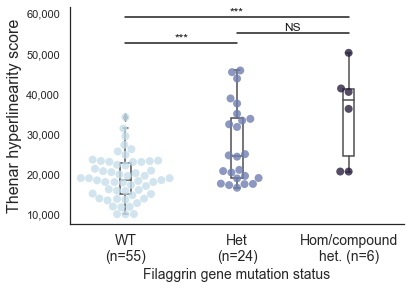

In [56]:
a = age3
ylab = 'Thenar hyperlinearity score'

ya="thenar_scores"
plotbox9(a=a, xa="FLG status_x", ya=ya, ylabel=ylab, alpha=0.8, s=8)
#plotbox2(a=a, xa="FLG status", ya=ya, ylabel=ylab, alpha=0.5, s=3.5, altlabel=True)
ymax = a[ya].max()
addstats(result01="***", result12="NS", result02="***", a=a, ya=ya)

sns.despine()
plt.show()


